# Spotify Music Exploratory Data Analysis

In [37]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
import datetime

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
from math import pi
%matplotlib inline

In [2]:
# read csv
df = pd.read_csv(r'~/Desktop/Project2_DeLaRosa_Patel_Yang/Spotify_Library_Stuff/our_tracks.csv')

### Data Cleaning and Sanity Checks

In [3]:
# sanity checks on data
df.isnull().sum()

username              0
added_at_playlist     0
uri                   0
name                  0
popularity            0
duration_ms           0
is_explicit           0
album_name            0
album_release_date    0
artists               0
artists_id            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
dtype: int64

In [4]:
df.head()

,username,added_at_playlist,uri,name,popularity,duration_ms,is_explicit,album_name,album_release_date,artists,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Lina,2021-03-30T01:20:10Z,spotify:track:41tTurAQi6EnvoijjUf0rk,Bob Ross,11,224510,False,Bob Ross,2021-03-28,Nxtime,...,0.864,0,-5.824,1,0.0339,0.0646,0.000091,0.186,0.802,126.047
1,Lina,2021-03-26T19:57:50Z,spotify:track:7rU6Iebxzlvqy5t857bKFq,Plastic Love,66,294493,False,Expressions,2008-05-21,Mariya Takeuchi,...,0.875,2,-5.141,0,0.0340,0.0747,0.000096,0.196,0.857,102.517
2,Lina,2021-03-24T16:31:07Z,spotify:track:6qziCLmMT1n8IevVTWl950,I Will Wait For You,40,190760,False,Her Greatest Hits & Finest Performances,1996-01-01,Connie Francis,...,0.308,10,-10.733,0,0.0312,0.9110,0.000019,0.223,0.254,96.320
3,Lina,2021-03-20T15:51:15Z,spotify:track:2yJ9GVCLMmzBBfQAnfzlwr,THat Part,66,313573,True,Blank Face LP,2016-07-08,"['ScHoolboy Q', 'Kanye West']",...,0.535,6,-7.590,0,0.0911,0.0855,0.000000,0.136,0.336,112.960
4,Lina,2021-03-05T02:09:57Z,spotify:track:5uEYRdEIh9Bo4fpjDd4Na9,Goosebumps - Remix,92,162802,True,Goosebumps (Remix),2021-01-15,"['Travis Scott', 'HVME']",...,0.593,1,-7.846,1,0.0379,0.4180,0.000000,0.124,0.808,124.917


In [5]:
df['uri'].nunique()

1197

In [6]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1200.000000,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,35.709167,2.946737e+05,0.547517,0.530735,5.179167,-10.775972,0.586667,0.061131,0.356315,0.370021,0.167364,0.353782,118.686958
std,22.847347,1.594555e+05,0.199348,0.242837,3.599240,5.423353,0.492637,0.059491,0.358197,0.394630,0.143035,0.239513,27.328200
min,0.000000,4.146100e+04,0.060100,0.003140,0.000000,-36.886000,0.000000,0.022500,0.000004,0.000000,0.030400,0.025300,58.830000
25%,19.000000,2.114935e+05,0.407750,0.364750,2.000000,-13.012000,0.000000,0.034375,0.025900,0.000097,0.093500,0.159000,100.018750
50%,37.000000,2.632255e+05,0.572000,0.547000,5.000000,-9.582500,1.000000,0.042500,0.214500,0.116500,0.113000,0.310500,119.998500
75%,53.000000,3.528110e+05,0.707250,0.715250,8.000000,-7.092500,1.000000,0.058425,0.692250,0.829500,0.182250,0.507250,131.732250
max,94.000000,3.815786e+06,0.962000,0.997000,11.000000,-2.108000,1.000000,0.493000,0.996000,0.993000,0.997000,0.975000,209.528000


In [7]:
df['username'].unique()

array(['Lina', 'Anand', 'Andres'], dtype=object)

In [8]:
df.groupby('username').count()

,added_at_playlist,uri,name,popularity,duration_ms,is_explicit,album_name,album_release_date,artists,artists_id,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
username,,,,,,,,,,,,,,,,,,,,,
Anand,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
Andres,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
Lina,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400


In [9]:
df.dtypes

username               object
added_at_playlist      object
uri                    object
name                   object
popularity              int64
duration_ms             int64
is_explicit              bool
album_name             object
album_release_date     object
artists                object
artists_id             object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
dtype: object

### Distribution of our music features

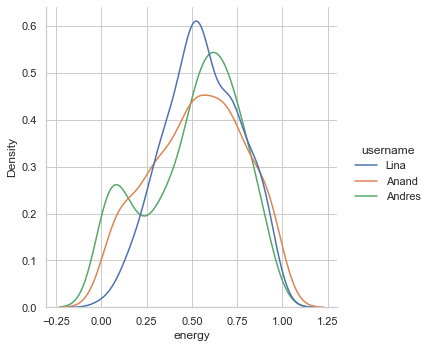

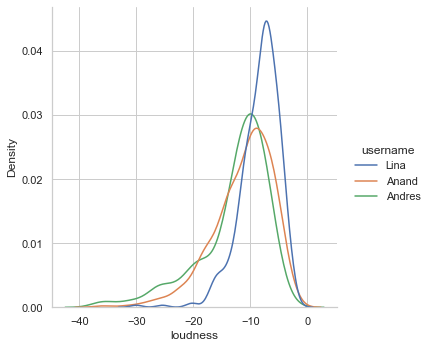

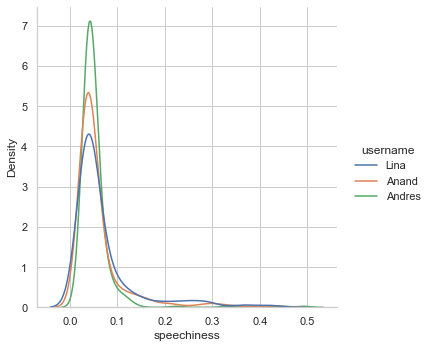

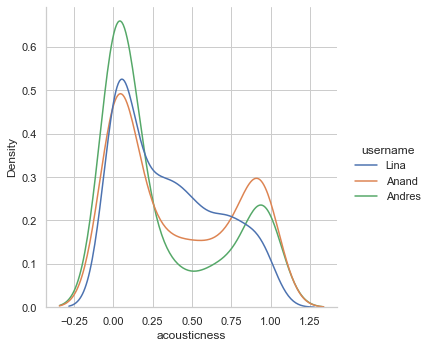

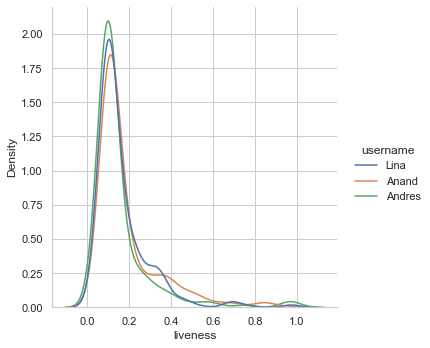

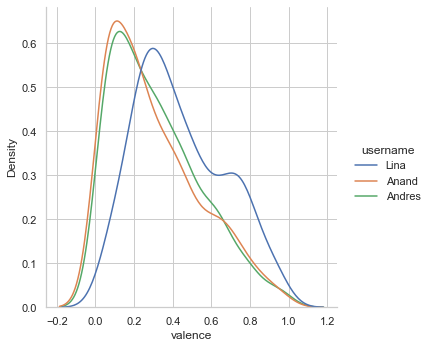

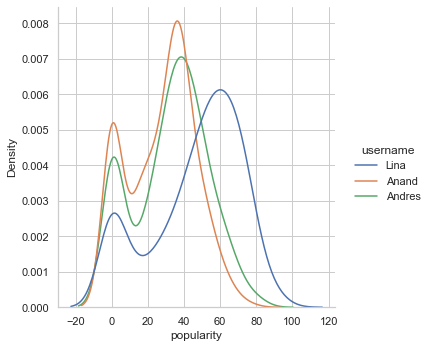

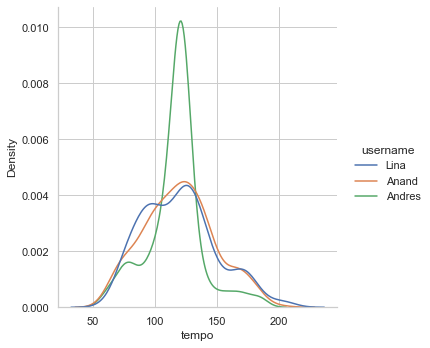

In [10]:
sns.set_theme(style='whitegrid')
# sns.set()
sns.displot(data=df, x="energy", hue="username", kind="kde")
sns.displot(data=df, x="loudness", hue="username", kind="kde")
sns.displot(data=df, x="speechiness", hue="username", kind="kde")
sns.displot(data=df, x="acousticness", hue="username", kind="kde")
sns.displot(data=df, x="liveness", hue="username", kind="kde")
sns.displot(data=df, x="valence", hue="username", kind="kde")
sns.displot(data=df, x="popularity", hue="username", kind="kde")
sns.displot(data=df, x="tempo", hue="username", kind="kde")

### Intersection of our Artist choices & Music (Venn Diagram)

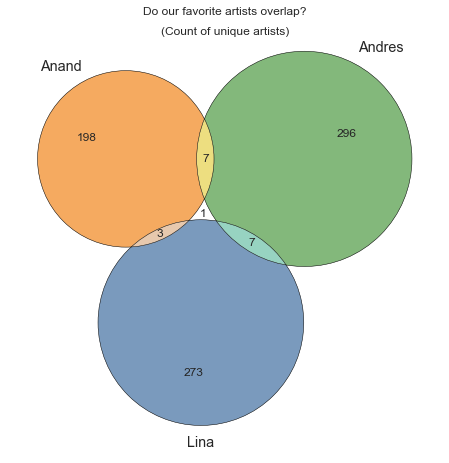

In [11]:
anand_artist = list(df.artists[df['username']=='Anand'].unique())
andres_artist = list(df.artists[df['username']=='Andres'].unique())
lina_artist = list(df.artists[df['username']=='Lina'].unique())

fig, ax = plt.subplots(1, figsize=(8,8))
venn3([set(anand_artist), set(andres_artist), set(lina_artist)],
      set_colors=('#f28e2b', '#59a14f', '#4e79a7'), 
      set_labels = ('Anand','Andres',
                    'Lina'),
      alpha=0.75)
venn3_circles([set(anand_artist), set(andres_artist), set(lina_artist)], lw=0.5)

plt.title('Do our favorite artists overlap?')
plt.text(x=-0.2, y=0.6,s='(Count of unique artists)')
plt.show()
# plt.savefig('venn_matrix.png')

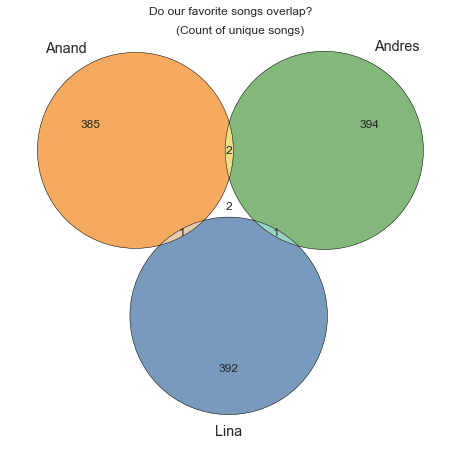

In [12]:
anand_artist = list(df.name[df['username']=='Anand'].unique())
andres_artist = list(df.name[df['username']=='Andres'].unique())
lina_artist = list(df.name[df['username']=='Lina'].unique())

fig, ax = plt.subplots(1, figsize=(8,8))
venn3([set(anand_artist), set(andres_artist), set(lina_artist)],
      set_colors=('#f28e2b', '#59a14f', '#4e79a7'), 
      set_labels = ('Anand','Andres',
                    'Lina'),
      alpha=0.75)
venn3_circles([set(anand_artist), set(andres_artist), set(lina_artist)], lw=0.5)

plt.title('Do our favorite songs overlap?')
plt.text(x=-0.18, y=0.57,s='(Count of unique songs)')

plt.show()
# plt.savefig('venn_matrix_songs.png')

#### Since our music and songs have little in common. What are those? 

In [13]:
# overlap of music
art_df = df.groupby(['username', 'artists']).size().reset_index(name='nunique').fillna(0)

a = np.array(art_df['nunique'].values.tolist())

art_df['nunique'] = np.where(a > 1, 1, a).tolist()

art_pivot = art_df.pivot(index="artists", columns="username", values="nunique").fillna(0)

art_pivot['same_count'] = art_pivot['Anand'] + art_pivot['Andres'] + art_pivot['Lina']

art_pivot.loc[art_pivot['same_count']>=3]

username,Anand,Andres,Lina,same_count
artists,,,,
Bicep,1.0,1.0,1.0,3.0


In [14]:
# overlap of music for Anand and Andres
art_pivot.loc[(art_pivot['Anand']==1) & (art_pivot['Andres'] == 1)]

username,Anand,Andres,Lina,same_count
artists,,,,
Against All Logic,1.0,1.0,0.0,2.0
Bicep,1.0,1.0,1.0,3.0
Chromatics,1.0,1.0,0.0,2.0
David Bowie,1.0,1.0,0.0,2.0
Desire,1.0,1.0,0.0,2.0
Floating Points,1.0,1.0,0.0,2.0
Jon Hopkins,1.0,1.0,0.0,2.0
Nicolas Jaar,1.0,1.0,0.0,2.0


In [15]:
# overlap of music of Anand and Lina
art_pivot.loc[(art_pivot['Anand']==1) & (art_pivot['Lina'] == 1)]

username,Anand,Andres,Lina,same_count
artists,,,,
Aphex Twin,1.0,0.0,1.0,2.0
Bicep,1.0,1.0,1.0,3.0
FKA twigs,1.0,0.0,1.0,2.0
Radiohead,1.0,0.0,1.0,2.0


In [16]:
# overlap of music of Andres and Lina
art_pivot.loc[(art_pivot['Andres']==1) & (art_pivot['Lina'] == 1)]

username,Anand,Andres,Lina,same_count
artists,,,,
Arcade Fire,0.0,1.0,1.0,2.0
Bicep,1.0,1.0,1.0,3.0
Four Tet,0.0,1.0,1.0,2.0
Joywave,0.0,1.0,1.0,2.0
Tame Impala,0.0,1.0,1.0,2.0
The xx,0.0,1.0,1.0,2.0
"['Howling', 'RY X', 'Frank Wiedemann']",0.0,1.0,1.0,2.0
"['ODESZA', 'Zyra']",0.0,1.0,1.0,2.0


### Who prefers the most mellow music?

In [17]:
# formula sourced from https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de
# boringness = loudness + tempo + (energy*100) + (danceability*100)
# the lower the score the more mellow our music tastes are

# the lower the score the more "boring" it is
df['how_mellow'] = df['loudness'] + df['tempo'] + df['energy']*100 + df['danceability']*100

Text(0.5, 0.98, 'What is the Distribition of our how_mellow scores?')

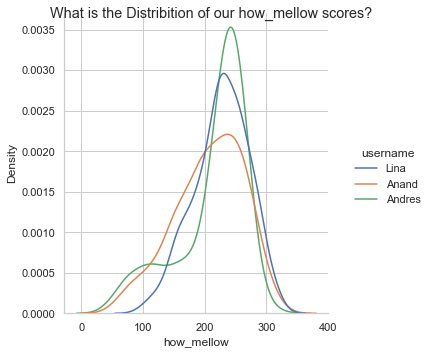

In [18]:
hist = sns.displot(data=df, x="how_mellow", hue="username", kind="kde")
hist.fig.suptitle("What is the Distribition of our how_mellow scores?")

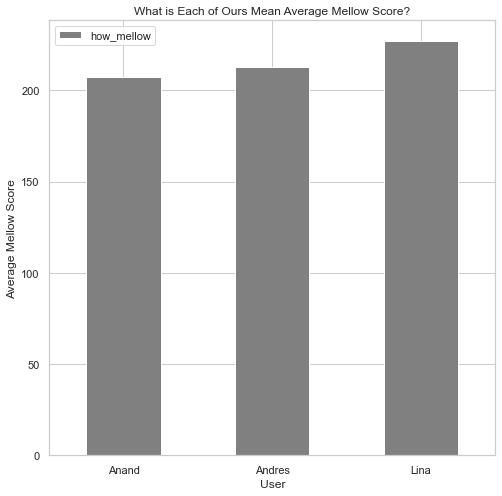

In [19]:
mellow_avg = df.groupby('username')['how_mellow'].mean().reset_index()
mellow_avg

sns.set_theme(style='whitegrid')
pd.pivot_table(df, index= 'username', values= "how_mellow", aggfunc=np.mean).plot(kind= 'bar', figsize = (8,8), color=['gray'])
plt.title("What is Each of Ours Mean Average Mellow Score?")
plt.xlabel("User")
plt.ylabel('Average Mellow Score')
plt.xticks(rotation=0)
plt.show()

### How does the boringness scale relate to time intervals? 

In [40]:
df['album_release_date'] = pd.to_datetime(df['album_release_date'], infer_datetime_format=True)
df['album_release_year'] = pd.DatetimeIndex(df['album_release_date']).year

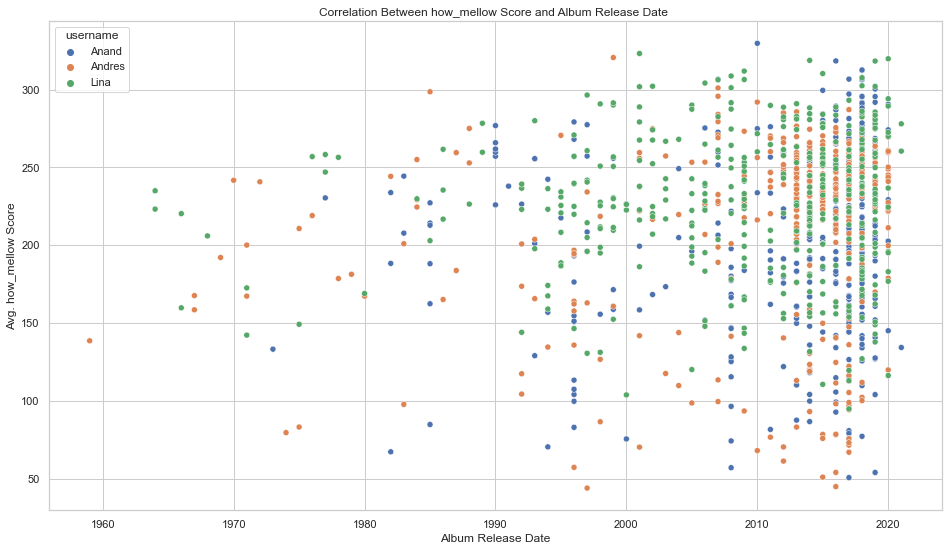

In [86]:
# create a df for correlation analysis

how_mellow_df = df.groupby(['username','uri','album_release_year'])['how_mellow'].mean().reset_index()

how_mellow_df['logarithm'] = np.log2(how_mellow_df['how_mellow'])

# song_count = df.groupby(['uri, username', 'album_release_year'])['uri'].count()

# corr_df = pd.merge(how_mellow_df, song_count, on=['uri','username'], how='inner')

how_mellow_df

plt.figure(figsize=(16,9))
mellow_corr = sns.scatterplot(x='album_release_year', y='how_mellow', hue='username', data=how_mellow_df);
mellow_corr.set_title('Correlation Between how_mellow Score and Album Release Date ');
mellow_corr.set_xlabel('Album Release Date');
mellow_corr.set_ylabel('Avg. how_mellow Score');

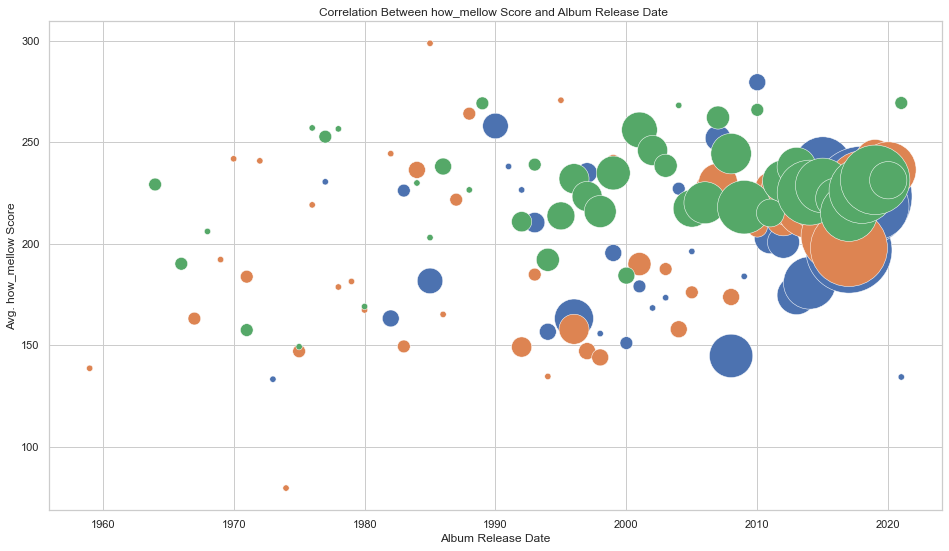

In [83]:
hm_df = df.groupby(['username','album_release_year'])['how_mellow'].mean().reset_index()

song_ct = df.groupby(['username','album_release_year'])['uri'].count().reset_index()

corr_df = pd.merge(hm_df, song_ct, on=['username','album_release_year'], how='inner')

plt.figure(figsize=(16,9))
mellow_corr_1 = sns.scatterplot(data=corr_df, x="album_release_year", y="how_mellow", size="uri", hue='username', legend=False, sizes=(40, 10000))
mellow_corr_1.set_title('Correlation Between how_mellow Score and Album Release Date ');
mellow_corr_1.set_xlabel('Album Release Date');
mellow_corr_1.set_ylabel('Avg. how_mellow Score');
plt.show()

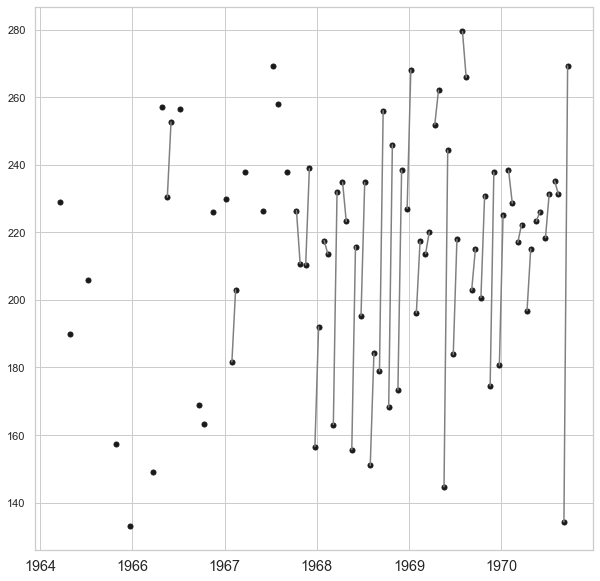

In [59]:
# slope graph. but probably won't include in report because it's a bit hard to read
fig, ax = plt.subplots(figsize=(10, 10))

# Set up list to track sites
year_list = []
i = 1.0
for year, subdf in how_mellow_df.groupby('album_release_year'):
    year_list.append(year)
    
    # Get the values for healthy and disease patients
    h = subdf.query('username == "Anand"')['how_mellow'].values
    d = subdf.query('username == "Lina"')['how_mellow'].values

    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2

    # Plot the lines connecting the dots
    for hi, di in zip(h, d):
        ax.plot([x1, x2], [hi, di], c='gray')

    # Plot the points
    ax.scatter(len(h)*[x1-0.01], h, c='k',
               s=25, label='Anand')
    ax.scatter(len(d)*[x2+0.01], d, c='k',
               s=25, label='Lina')


    # Update x-axis
    i += 1

# Fix the axes and labels
# ax.set_xticks()
_ = ax.set_xticklabels(year_list, fontsize='x-large')

### What is the relative weight of our music preferences? Comparing multiple quantitative variables

In [20]:
# set up the data frame to only include quantitative features
features_df = df

delete = ['added_at_playlist', 'uri', 'name', 'is_explicit', 'album_name', 'album_release_date', 'artists', 'artists_id','key', 'mode']

features_df.drop(delete, axis=1,inplace=True)

# standardize each of the chosen features on a scale of 0-100

factors = ['popularity', 'duration_ms', 'danceability','energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'how_mellow']

# new scale 
new_max = 100
new_min = 0
new_range = new_max-new_min 

# linear transformation on each variable to 0 to 100
for factor in factors:
  max_val = features_df[factor].max()
  min_val = features_df[factor].min()
  val_range = max_val - min_val
  features_df[factor + '_Adj'] = features_df[factor].apply(
      lambda x: (((x - min_val) * new_range) / val_range) + new_min)
    
# trim down the df to include only features we want in our radar chart
radar_df = features_df.loc[:, ['username', 'popularity_Adj', 'duration_ms_Adj', 'danceability_Adj','energy_Adj', 'loudness_Adj', 
                          'speechiness_Adj', 'acousticness_Adj', 'instrumentalness_Adj', 'liveness_Adj', 'valence_Adj', 'tempo_Adj', 'how_mellow_Adj']]

# rename the cols so they are more user friendly
radar_df.rename(columns={
    'popularity_Adj': 'popularity', 
    'duration_ms_Adj': 'duration_ms',
    'danceability_Adj': 'danceability',
    'energy_Adj': 'energy', 
    'loudness_Adj':'loudness',
    'speechiness_Adj': 'speechiness',
    'acousticness_Adj': 'acousticness', 
    'instrumentalness_Adj': 'instrumentalness', 
    'liveness_Adj': 'liveness', 
    'valence_Adj': 'valence', 
    'tempo_Adj': 'tempo', 
    'how_mellow_Adj': 'how_mellow'
    }, inplace=True)
    
radar_df.set_index('username', inplace=True)

# get the average of the vectors
radar_df_avg = radar_df.groupby(['username']).mean()

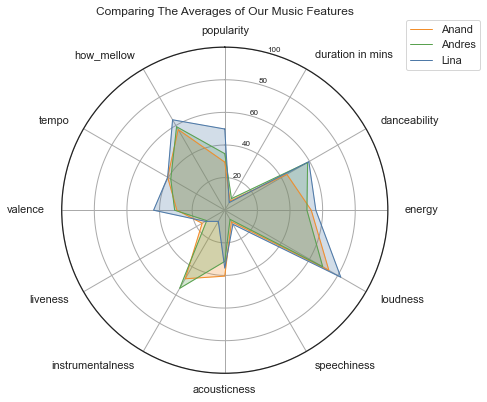

In [21]:
# source: https://www.pythoncharts.com/matplotlib/radar-charts/
# Each attribute we'll plot in the radar chart.
labels = ['popularity','duration in mins', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'how_mellow']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each username on the radar chart.
def add_to_radar(username, color):
  values = radar_df_avg.loc[username].values.tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=username)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each username to the chart.
add_to_radar('Anand', '#f28e2b')
add_to_radar('Andres', '#59a14f')
add_to_radar('Lina', '#4e79a7')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FFFFFF')

# Add title.
ax.set_title('Comparing The Averages of Our Music Features', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

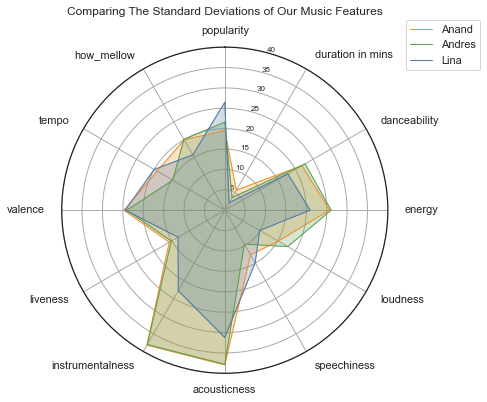

In [22]:
# source: https://www.pythoncharts.com/matplotlib/radar-charts/
# get the standard deviation of music features
std_dev_df = radar_df.groupby(['username']).std()

# Each attribute we'll plot in the radar chart.
labels = ['popularity','duration in mins', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'how_mellow']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each username on the radar chart.
def add_to_radar(username, color):
  values = std_dev_df.loc[username].values.tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=username)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each username to the chart.
add_to_radar('Anand', '#f28e2b')
add_to_radar('Andres', '#59a14f')
add_to_radar('Lina', '#4e79a7')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 40)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FFFF')

# Add title.
ax.set_title('Comparing The Standard Deviations of Our Music Features', y=1.08)

# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))